<a href="https://colab.research.google.com/github/itberrios/algotrading/blob/main/descriptive_analytics/data_explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Exploration**

In this notebook we will load the data and inspect it.

## Install libraries

In [ ]:
!pip install alpha_vantage

In [ ]:
!pip install pandas_ta

## Get stock data

In [16]:
!git clone https://github.com/itberrios/algotrading

Cloning into 'algotrading'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 95 (delta 27), reused 52 (delta 7), pack-reused 0
Unpacking objects: 100% (95/95), done.


## Base Library

These [regex](https://docs.python.org/3/library/re.html) are [useful](https://stackoverflow.com/questions/2973436/regex-lookahead-lookbehind-and-atomic-groups). So is [this](https://www.regular-expressions.info/lookaround.html).

In [47]:
import os
import re
from glob import glob
import numpy as np
import pandas as pd
import pandas_ta as ta
import alpha_vantage
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)
%matplotlib inline

#### Get data and write utility functions

In [15]:
csv_paths = sorted(glob(r'algotrading/data/*.csv'))

In [53]:
get_name = lambda x : re.search('\w+(?=_15min)', x).group()

In [55]:
for _path in csv_paths:
    df = pd.read_csv(_path, index_col=0)
    print(df.shape, df.index[0], ' ', df.index[1])

(31623, 5) 2020-10-01 04:15:00   2020-10-01 04:30:00
(15526, 5) 2020-10-02 09:30:00   2020-10-02 09:45:00
(31152, 5) 2020-10-01 04:15:00   2020-10-01 04:30:00
(14890, 5) 2020-10-02 08:15:00   2020-10-02 09:30:00
(13970, 5) 2020-10-02 09:45:00   2020-10-02 10:00:00
(20493, 5) 2020-10-01 04:15:00   2020-10-01 04:30:00
(16795, 5) 2020-10-01 07:30:00   2020-10-01 07:45:00
(28458, 5) 2020-10-02 04:15:00   2020-10-02 04:30:00
(24398, 5) 2020-10-01 04:15:00   2020-10-01 04:45:00
(20860, 5) 2020-10-02 04:30:00   2020-10-02 05:30:00
(15754, 5) 2020-10-02 08:15:00   2020-10-02 08:30:00
(14366, 5) 2020-10-02 07:15:00   2020-10-02 07:30:00
(30076, 5) 2020-10-01 04:15:00   2020-10-01 04:30:00
(15085, 5) 2020-10-02 08:15:00   2020-10-02 09:30:00
(14030, 5) 2020-10-02 07:15:00   2020-10-02 08:15:00
(16305, 5) 2020-10-02 04:15:00   2020-10-02 06:15:00
(15811, 5) 2020-10-02 08:15:00   2020-10-02 09:45:00
(22748, 5) 2020-10-02 04:15:00   2020-10-02 05:00:00
(13665, 5) 2020-10-02 06:00:00   2020-10-02 06

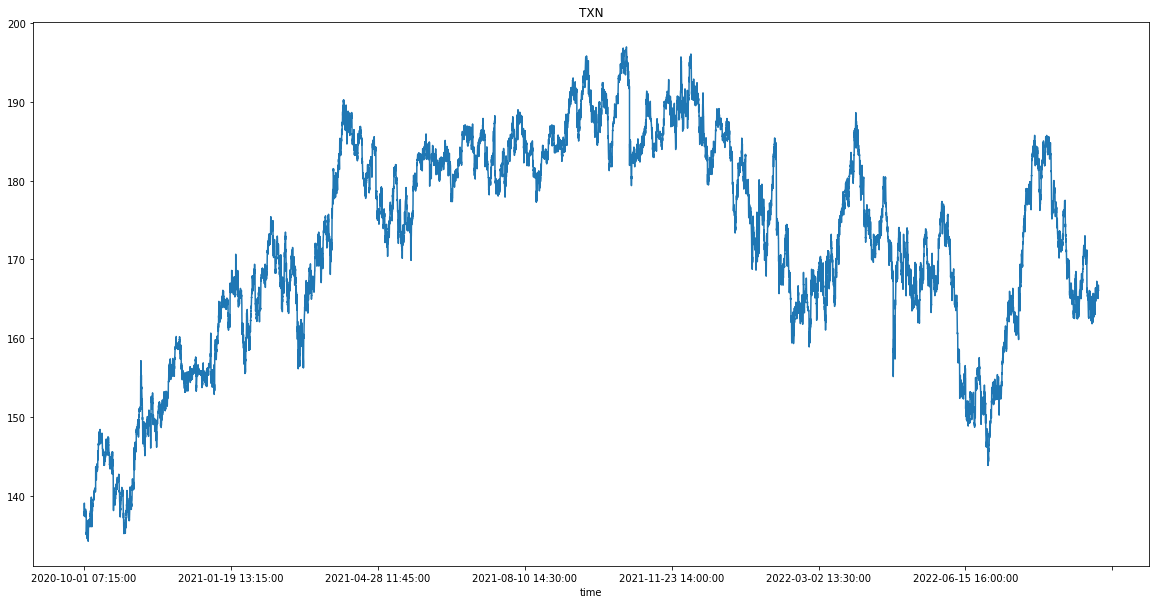

In [58]:
df['close'].plot(figsize=(20, 10))
plt.title(get_name(_path));

## Get closing times

In [82]:
# closing_times = {}
closing_times = []
for _path in csv_paths:
    # get Pandas Series with appropriate name
    ser = pd.read_csv(_path, index_col=0)['close']
    ser.name = get_name(_path)

    # remove duplicates
    ser = ser[~ser.index.duplicated()]

    closing_times.append(ser)
    # closing_times.update({get_name(_path) : df['close']})

In [84]:
close_df = pd.concat(closing_times, axis=1)
close_df.shape

(31744, 30)

## Display percentage of NaNs in each stock closing price

In [91]:
close_df.isna().sum() / len(close_df) * 100

AAPL     0.381174
ADI     51.089970
AMD      1.864919
ANET    53.093498
APH     55.991683
ASML    35.442918
AVGO    47.092364
BA      10.351562
CSCO    23.141381
ENPH    34.286794
FTNT    50.371724
GD      54.744204
INTC     5.456149
KLAC    52.479209
LHX     55.802671
LMT     48.733619
MCHP    50.192162
MRVL    28.339214
MSI     56.952495
MU      10.187752
NOC     54.882812
NVDA     5.582157
NXPI    48.346144
QCOM    21.944304
RTX     43.709047
STM     33.845766
TDG     57.327369
TEL     56.810736
TSM     10.512223
TXN     45.725176
dtype: float64

In [87]:
close_df.corr()

,AAPL,ADI,AMD,ANET,APH,ASML,AVGO,BA,CSCO,ENPH,...,NOC,NVDA,NXPI,QCOM,RTX,STM,TDG,TEL,TSM,TXN
AAPL,1.000000,0.679804,0.680467,0.943934,0.866111,0.472393,0.911567,-0.235451,0.685622,0.504705,...,0.655321,0.762163,0.482451,0.666285,0.762063,0.567555,0.508105,0.626875,0.094081,0.473281
ADI,0.679804,1.000000,0.664597,0.706991,0.854417,0.823343,0.708378,0.192950,0.764312,0.518766,...,0.371872,0.731812,0.843991,0.498849,0.647781,0.711253,0.694858,0.865937,0.435795,0.874885
AMD,0.680467,0.664597,1.000000,0.685837,0.836782,0.680458,0.663878,0.084085,0.685824,0.243827,...,0.111326,0.924861,0.638557,0.804957,0.349290,0.892924,0.382679,0.792394,0.412263,0.511866
ANET,0.943934,0.706991,0.685837,1.000000,0.870073,0.476278,0.936234,-0.223586,0.658527,0.550960,...,0.699088,0.790947,0.495324,0.641357,0.797605,0.561046,0.556122,0.629338,0.077287,0.477527
APH,0.866111,0.854417,0.836782,0.870073,1.000000,0.735709,0.819886,0.043258,0.802804,0.492787,...,0.445461,0.862753,0.736748,0.688009,0.636045,0.797979,0.633614,0.869786,0.314786,0.711693
ASML,0.472393,0.823343,0.680458,0.476278,0.735709,1.000000,0.492334,0.483678,0.900925,0.126314,...,0.032652,0.758581,0.908566,0.415238,0.408461,0.802153,0.596458,0.905255,0.657736,0.898913
AVGO,0.911567,0.708378,0.663878,0.936234,0.819886,0.492334,1.000000,-0.247726,0.680677,0.419700,...,0.674424,0.762789,0.544000,0.604803,0.816528,0.573821,0.497500,0.621467,0.148326,0.494703
BA,-0.235451,0.192950,0.084085,-0.223586,0.043258,0.483678,-0.247726,1.000000,0.408427,-0.282488,...,-0.625647,0.079894,0.514529,0.105009,-0.211029,0.315876,0.453143,0.398216,0.752243,0.487502
CSCO,0.685622,0.764312,0.685824,0.658527,0.802804,0.900925,0.680677,0.408427,1.000000,0.102420,...,0.212432,0.804171,0.874895,0.526917,0.607024,0.754302,0.661223,0.892106,0.591820,0.824382
ENPH,0.504705,0.518766,0.243827,0.550960,0.492787,0.126314,0.419700,-0.282488,0.102420,1.000000,...,0.520020,0.218386,0.166383,0.207668,0.413474,0.160709,0.333493,0.278747,-0.174556,0.282940


AAPL, MSI, APH, ANET

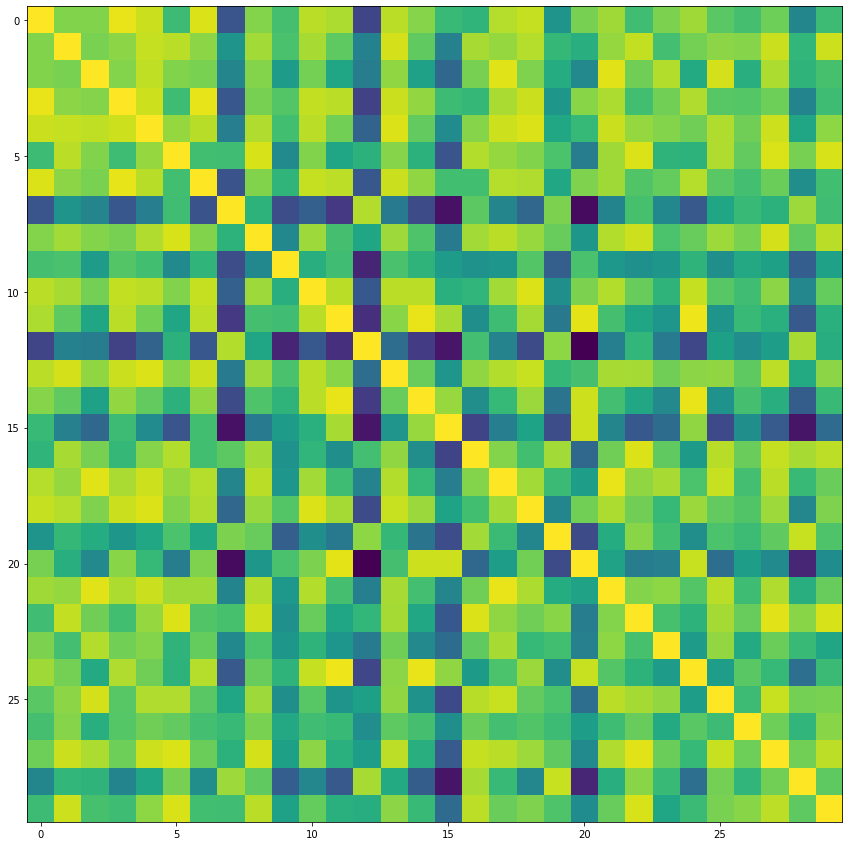

In [89]:
fig = plt.figure(figsize=(15, 15))
plt.imshow(close_df.corr().to_numpy())

## Clean time data

In [100]:
close_df_old = close_df.copy()

In [101]:
close_df.index = pd.to_datetime(close_df.index)

In [102]:
close_df.index

DatetimeIndex(['2020-10-01 04:15:00', '2020-10-01 04:30:00',
               '2020-10-01 04:45:00', '2020-10-01 05:00:00',
               '2020-10-01 05:15:00', '2020-10-01 05:30:00',
               '2020-10-01 05:45:00', '2020-10-01 06:00:00',
               '2020-10-01 06:15:00', '2020-10-01 06:30:00',
               ...
               '2022-09-21 04:45:00', '2022-09-21 05:45:00',
               '2021-08-20 06:45:00', '2022-03-03 06:00:00',
               '2022-09-21 05:00:00', '2022-09-21 05:15:00',
               '2022-09-21 07:00:00', '2021-09-22 05:30:00',
               '2021-12-31 05:15:00', '2021-01-14 20:15:00'],
              dtype='datetime64[ns]', name='time', length=31744, freq=None)

In [106]:
dayofweek = close_df.index.dayofweek
hour = close_df.index.hour
minute = close_df.index.minute

In [111]:
print(dayofweek.unique())
print(hour.unique())
print(minute.unique())

Int64Index([3, 4, 0, 1, 2], dtype='int64', name='time')
Int64Index([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64', name='time')
Int64Index([15, 30, 45, 0], dtype='int64', name='time')


In [144]:
# filter to get regular trading times
close_df_reg = close_df.iloc[~((hour == 9) & (minute < 30)) 
                              & ((hour >= 9) & (hour <= 16))]

In [145]:
dayofweek_reg = close_df_reg.index.dayofweek
hour_reg = close_df_reg.index.hour
minute_reg = close_df_reg.index.minute

print(dayofweek_reg.unique())
print(hour_reg.unique())
print(minute_reg.unique())

Int64Index([3, 4, 0, 1, 2], dtype='int64', name='time')
Int64Index([9, 10, 11, 12, 13, 14, 15, 16], dtype='int64', name='time')
Int64Index([30, 45, 0, 15], dtype='int64', name='time')


In [160]:
close_df_reg

,AAPL,ADI,AMD,ANET,APH,ASML,AVGO,BA,CSCO,ENPH,...,NOC,NVDA,NXPI,QCOM,RTX,STM,TDG,TEL,TSM,TXN
time,,,,,,,,,,,,,,,,,,,,,
2020-10-01 09:30:00,116.296523,NaN,83.170,NaN,NaN,368.856972,349.399011,NaN,37.172429,NaN,...,NaN,137.256701,NaN,NaN,NaN,NaN,NaN,NaN,79.196457,138.574814
2020-10-01 09:45:00,115.560406,NaN,83.560,NaN,NaN,369.210830,350.281835,NaN,37.205695,NaN,...,NaN,136.247046,NaN,NaN,NaN,NaN,NaN,NaN,79.196457,139.031403
2020-10-01 10:00:00,115.031785,NaN,83.680,NaN,NaN,369.162764,348.762998,NaN,36.982337,NaN,...,NaN,136.176151,NaN,NaN,NaN,NaN,NaN,NaN,78.907066,138.493960
2020-10-01 10:15:00,115.268924,NaN,83.620,NaN,NaN,369.328782,347.623870,NaN,36.949071,NaN,...,NaN,136.119330,NaN,NaN,NaN,NaN,NaN,NaN,79.235042,137.942248
2020-10-01 10:30:00,115.259142,NaN,83.625,NaN,NaN,369.879227,347.471986,NaN,36.914665,NaN,...,NaN,135.520474,NaN,NaN,NaN,NaN,NaN,NaN,79.128932,137.804320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-27 15:45:00,NaN,NaN,NaN,68.14,64.552289,NaN,NaN,216.50,NaN,NaN,...,297.278540,NaN,NaN,NaN,70.895775,39.103441,575.303368,112.351436,95.247967,NaN
2020-12-24 15:45:00,NaN,NaN,NaN,72.21,63.332906,NaN,NaN,217.15,NaN,NaN,...,291.032417,NaN,NaN,NaN,67.404223,36.536694,590.056981,116.745720,102.657358,NaN
2021-11-26 15:45:00,NaN,NaN,NaN,124.97,80.727707,NaN,NaN,199.21,NaN,NaN,...,350.089033,NaN,NaN,NaN,81.579497,47.262371,545.883672,154.125051,114.759214,NaN


#### et percentage of NaNs in time cleaned data

In [149]:
close_df_reg.isna().sum() / len(close_df_reg) * 100

AAPL    0.228479
ADI     5.537262
AMD     0.221759
ANET    7.949735
APH     8.574693
ASML    5.322223
AVGO    4.045427
BA      0.335999
CSCO    1.175996
ENPH    2.553592
FTNT    6.417579
GD      8.158054
INTC    0.288959
KLAC    6.693099
LHX     8.386533
LMT     6.397420
MCHP    5.759022
MRVL    1.962234
MSI     9.018211
MU      0.450239
NOC     8.399973
NVDA    0.275519
NXPI    5.423023
QCOM    1.377596
RTX     4.717425
STM     5.893421
TDG     9.481890
TEL     8.890532
TSM     0.954237
TXN     3.736308
dtype: float64

In [192]:
close_df_reg.shape

(14881, 30)

In [191]:
close_df_reg.dropna().shape

(13267, 30)

In [155]:
close_df_reg.dropna().corr()

,AAPL,ADI,AMD,ANET,APH,ASML,AVGO,BA,CSCO,ENPH,...,NOC,NVDA,NXPI,QCOM,RTX,STM,TDG,TEL,TSM,TXN
AAPL,1.000000,0.677851,0.680393,0.942172,0.865912,0.483963,0.911357,-0.241229,0.652850,0.506278,...,0.651080,0.768866,0.481695,0.660246,0.740166,0.571612,0.506948,0.625852,0.098692,0.467576
ADI,0.677851,1.000000,0.662897,0.706052,0.855129,0.824289,0.707747,0.197119,0.766800,0.520414,...,0.373415,0.732649,0.844513,0.498540,0.645025,0.711237,0.694474,0.865655,0.441106,0.875675
AMD,0.680393,0.662897,1.000000,0.680515,0.833599,0.675483,0.658907,0.089283,0.682871,0.248835,...,0.101695,0.920844,0.641252,0.798371,0.323573,0.896293,0.381680,0.792179,0.424515,0.509783
ANET,0.942172,0.706052,0.680515,1.000000,0.869786,0.471350,0.935858,-0.242589,0.644370,0.553220,...,0.699011,0.787421,0.492967,0.631736,0.795308,0.555871,0.556911,0.629664,0.058197,0.471444
APH,0.865912,0.855129,0.833599,0.869786,1.000000,0.737631,0.819045,0.048328,0.801613,0.498555,...,0.445470,0.860282,0.738001,0.684718,0.636311,0.797653,0.634552,0.870526,0.313470,0.713243
ASML,0.483963,0.824289,0.675483,0.471350,0.737631,1.000000,0.485208,0.477782,0.904482,0.133599,...,0.033591,0.759857,0.910524,0.404334,0.403094,0.802601,0.597470,0.905297,0.661216,0.899340
AVGO,0.911357,0.707747,0.658907,0.935858,0.819045,0.485208,1.000000,-0.246087,0.670228,0.423320,...,0.672025,0.759447,0.540673,0.600581,0.809897,0.568876,0.497314,0.620188,0.137395,0.486075
BA,-0.241229,0.197119,0.089283,-0.242589,0.048328,0.477782,-0.246087,1.000000,0.410263,-0.287729,...,-0.626066,0.068629,0.512047,0.102665,-0.250435,0.324253,0.452725,0.399130,0.763684,0.489684
CSCO,0.652850,0.766800,0.682871,0.644370,0.801613,0.904482,0.670228,0.410263,1.000000,0.082823,...,0.200580,0.800973,0.877745,0.510064,0.558888,0.758083,0.660354,0.892032,0.605697,0.825576
ENPH,0.506278,0.520414,0.248835,0.553220,0.498555,0.133599,0.423320,-0.287729,0.082823,1.000000,...,0.519282,0.228997,0.163394,0.210750,0.404533,0.166975,0.336938,0.283733,-0.179762,0.277127


### Display Correlations

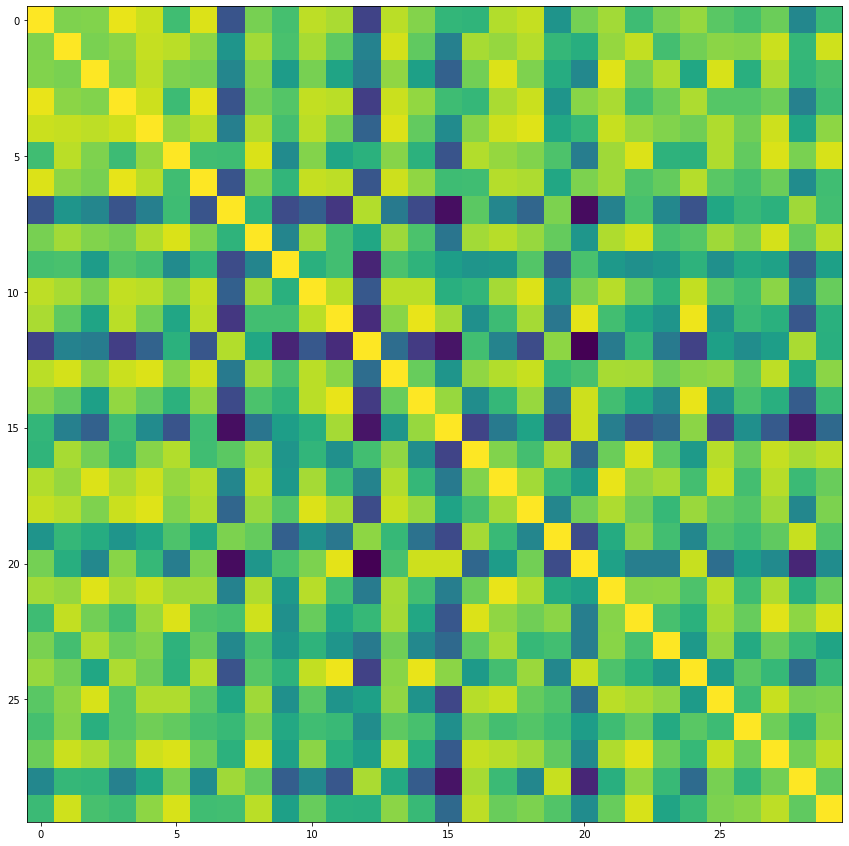

In [162]:
corr_mat = close_df_reg.dropna().corr().to_numpy()

fig = plt.figure(figsize=(15, 15))
plt.imshow(corr_mat);

In [175]:
# set diagonals to 0's
np.fill_diagonal(corr_mat, 0)

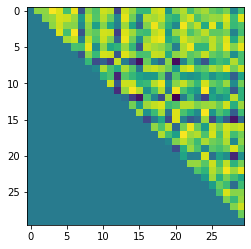

In [177]:
plt.imshow(np.triu(corr_mat));

In [182]:
corr_idxs = np.where(np.triu(corr_mat) > 0.90)

for idx in np.array(corr_idxs).T:
    print(idx)

[0 3]
[0 6]
[ 2 17]
[ 2 21]
[3 6]
[ 4 13]
[ 4 18]
[5 8]
[ 5 22]
[ 5 27]
[10 18]
[11 14]
[11 20]
[11 24]
[14 24]
[16 22]
[17 21]
[22 27]


In [183]:
corr_mat[corr_idxs]

array([0.94217218, 0.91135715, 0.9123251 , 0.92084356, 0.93585814,
       0.91195894, 0.91494613, 0.90448199, 0.91052377, 0.90529652,
       0.90971357, 0.94213362, 0.92944813, 0.95769149, 0.94426818,
       0.90884559, 0.94173634, 0.92540213])

In [189]:
for idx in np.unique(corr_idxs[0]):
    print(close_df_reg.columns[idx])

AAPL
AMD
ANET
APH
ASML
FTNT
GD
LHX
MCHP
MRVL
NXPI
